<font size = "5"> **Lecture 2:  [Information in STEM](https://github.com/gduscher/ML-ElectronMicroscopy-2023/tree/main/Lecture%202)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />


# Adaptive Fourier Filtering


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/Lecture%202/2_Adaptive_Fourier_Filter.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SergeiVKalinin/ML-ElectronMicroscopy-2023/blob/main/Lecture%202/2_Adaptive_Fourier_Filter.ipynb)

part of Online Course

<font size = "5"> **[Machine Learning in Scanning Electron Microscopy 2023](https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023)**</font>

<font size = "3"> **[Lecture 2](https://github.com/gduscher/ML-ElectronMicroscopy-2023/tree/main/Lecture%202)**</font>

by Gerd Duscher, 2023


Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville





## Content

An introduction into Fourier analysis of images.

## Prerequesites

### Install packages

If you run this in Google Colab or if you want to test your local installation "run the code cell below" to ensure that [pyTEMlib](https://github.com/gduscher/pyTEMlib) and dependent packages are installed.



In [5]:
import sys

from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = (get_distribution(package_name).version)
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2023.5.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/sidpy.git@main -q
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/SciFiReaders.git@main -q
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@use_dict_2 -q
    
# ------------------------------
print('done')

done


## Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets. 

This notebook is based on the **image_tool** package of pyTEMlib 


In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pylab as plt 

import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

import pyTEMlib
from pyTEMlib import file_tools     # File input/ output library
from pyTEMlib import image_tools     # File input/ output library

print('pyTEMlib version: ', pyTEMlib.__version__)
note_book_version = '2023.06.03'
note_book_name='2-Adaptive_Fourier_Filter'

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available
pyTEMlib version:  0.2023.5.1


## Open File
Upload Files in case you did not do that earlier (only in Unix systems).

In [3]:
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/p1-hr3-ZnOonGraphite.dm3
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/p1-hr4-ZnOonGraphite.dm3

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


Note: select the file and the dataset, in case there are several.

In [4]:
fileWidget = file_tools.FileWidget()

Now, we open and plot the selected dataset. Select another one and rerun only cell below (Home button gets you back to original).
>
> Please note that you can zoom and drag the intensity values in the colorbar.
>

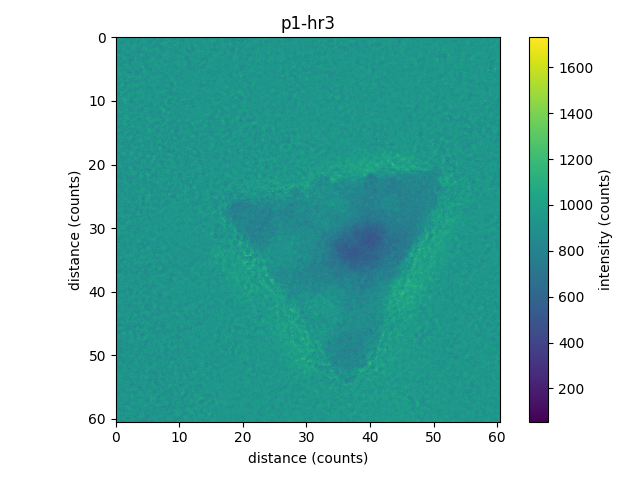

In [5]:
dataset = fileWidget.selected_dataset
datasets = fileWidget.datasets
if dataset.data_type.name != 'IMAGE':
    print('We really would need an image here')

view = dataset.plot()

## Power Spectrum of Image

fft :
	smoothing : 1
	minimum_intensity : 10.347678120521277
	maximum_intensity : 16.38093574996161
source:  p1-hr3


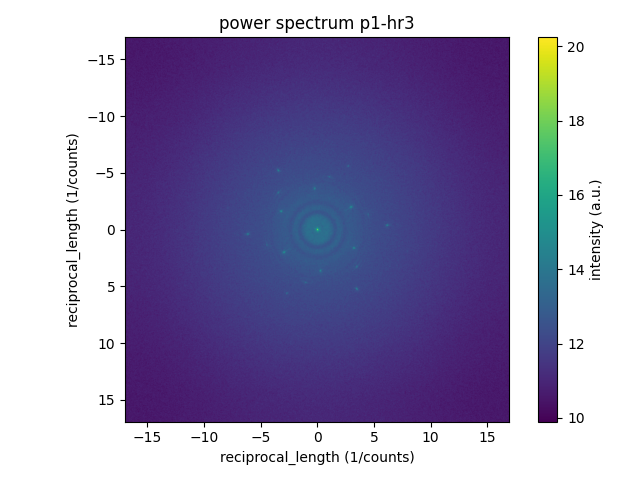

In [6]:
power_spectrum = image_tools.power_spectrum(dataset, smoothing=1)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = power_spectrum.plot()

## Spot Detection in Fourier Transform

Found 21 reflections


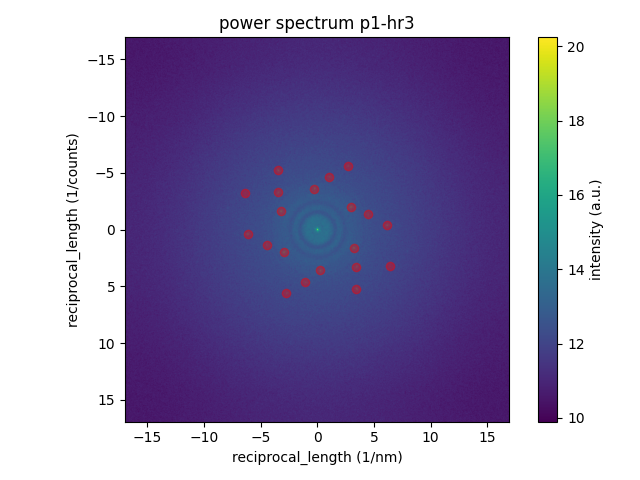

In [29]:
# ------Input----------
spot_threshold = 0.05
# ---------------------
RESOLUTION = 10.0  # in 1/nm

spots = image_tools.diffractogram_spots(power_spectrum, spot_threshold=spot_threshold)

spots = spots[np.linalg.norm(spots[:, :2],axis=1)<RESOLUTION, :]
spots = spots[np.linalg.norm(spots[:, :2],axis=1)>0.5, :]
power_spectrum.u.units = '1/nm'
power_spectrum.plot()

plt.gca().scatter(spots[:,0],spots[:,1], color='red', alpha=0.4);

## Adaptive Fourier Filter

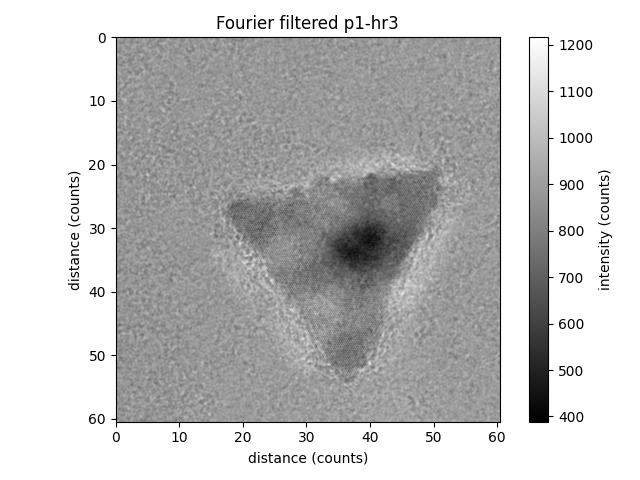

In [28]:
filtered_dataset = image_tools.adaptive_fourier_filter(dataset, spots, low_pass=2.0, reflection_radius=.3)
view = filtered_dataset.plot(cmap='gray')

Let's see what we did - In Fourier space, of course.

fft :
	smoothing : 1
	minimum_intensity : 10.347678120521277
	maximum_intensity : 16.38093574996161
source:  p1-hr3


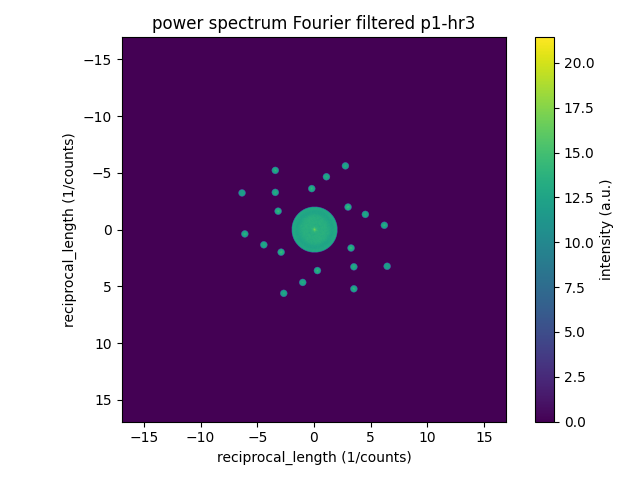

In [30]:
filtered_power_spectrum = image_tools.power_spectrum(filtered_dataset, smoothing=0)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = filtered_power_spectrum.plot()

Please note that the spots are ordered from center to outside.

The third parameter of a spot is its angle.

In [43]:
print(np.round(spots[:5],3))
print(np.round(1/np.linalg.norm(spots, axis=1)*10 , 3), 'Angstrom')

[[-2.944  1.984 -0.978]
 [ 2.944 -1.984  2.164]
 [-3.208 -1.621 -2.039]
 [ 3.208  1.621  1.103]
 [-0.248 -3.605 -3.073]]
[2.716 2.405 2.42  2.66  2.108 2.767 2.069 1.992 1.887 2.07  1.79  2.098
 1.58  1.572 1.474 1.602 1.481 1.593 1.345 1.382] Angstrom


## Log the result

In [44]:
filtered_dataset.title = 'Fourier_Filtered_Image'
datasets.update({'Log_000': filtered_dataset})

### Save Datasets to file

In [45]:
group = file_tools.save_dataset(datasets, filename=dataset.metadata['filename'])

C:\Users\gduscher\AppData\Local\anaconda3\envs\pyTEMlib\Lib\site-packages\pyNSID\io\hdf_io.py:111: UserWarning: main_data_name should not contain the "-" character. Reformatted name from:p1-hr3 to p1_hr3
  warn('main_data_name should not contain the "-" character. Reformatted'
C:\Users\gduscher\AppData\Local\anaconda3\envs\pyTEMlib\Lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\AppData\Local\anaconda3\envs\pyTEMlib\Lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


A convenient function to select a dataset (for further processing, visualization or whatever)

In [46]:
chooser = file_tools.ChooseDataset(datasets)

Dropdown(description='select dataset:', options=('Channel_000: p1-hr3', 'Log_000: Fourier_Filtered_Image'), va…

In [47]:
chooser.dataset.metadata

{'analysis': 'adaptive fourier filtered',
 'spots': array([[-2.94365681,  1.98448774, -0.97762581],
        [ 2.94365681, -1.98448774,  2.16396684],
        [-3.20825517, -1.62066498, -2.03855914],
        [ 3.20825517,  1.62066498,  1.10303351],
        [-0.24806097, -3.60515272, -3.0728936 ],
        [ 0.24806097,  3.60515272,  0.06869906],
        [-4.46509741,  1.33952922, -1.27933953],
        [ 4.46509741, -1.33952922,  1.86225312],
        [-3.45631614, -3.27440476, -2.32917404],
        [ 3.45631614,  3.27440476,  0.81241861],
        [ 1.04185606, -4.64700878,  2.92104047],
        [-1.04185606,  4.64700878, -0.22055218],
        [-6.13537458,  0.38036015, -1.50888096],
        [ 6.13537458, -0.38036015,  1.6327117 ],
        [ 2.71213324, -5.60617785,  2.69100843],
        [-2.71213324,  5.60617785, -0.45058422],
        [-3.45631614, -5.20928031, -2.55579107],
        [ 3.45631614,  5.20928031,  0.58580158],
        [-6.38343555, -3.22479257, -2.03858042],
        [ 6.383435

A tree-like plot of the file

In [38]:
filename = dataset.h5_dataset.file.filename
print(dataset.h5_dataset.file.filename)
file_tools.h5_tree(dataset.h5_dataset.file)

C:\Users\gduscher\Documents\Github\20230425\20230425 1230 STEM HAADF 8.60 Mx-1.hf5
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ HAADF
      -----
      ├ HAADF
      ├ metadata
        --------
        ├ experiment
          ----------
          ├ stage
            -----
            ├ position
              --------
            ├ tilt
              ----
      ├ original_metadata
        -----------------
        ├ Acquisition
          -----------
          ├ AcquisitionDatetime
            -------------------
          ├ AcquisitionStartDatetime
            ------------------------
        ├ BinaryResult
          ------------
          ├ Offset
            ------
          ├ PixelSize
            ---------
        ├ Core
          ----
        ├ CustomProperties
          ----------------
          ├ Aperture[C1].Name
            -----------------
          ├ Aperture[C2].Name
            -----------------
          ├ Aperture[C3].Name
            -----

## Close File
let's close the file but keep the filename

In [39]:
dataset.h5_dataset.file.close()

## Simulate new notebook
We can now simulate a new notebook and open the file again.



In [40]:
new_datasets= file_tools.open_file(filename)
choose_image = file_tools.ChooseDataset(new_datasets)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

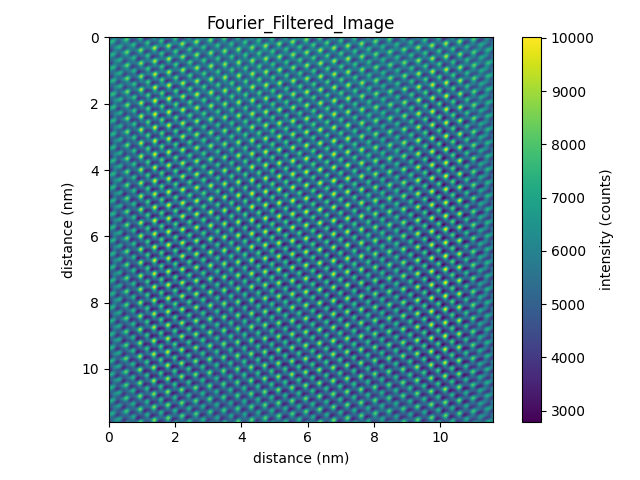

In [41]:
view = choose_image.dataset.plot()

We want to make an image operation of the images in the file.

In [44]:
choose_image = file_tools.ChooseDataset(new_datasets)
print('       subtract')
choose_image2 = file_tools.ChooseDataset(new_datasets)

Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

       subtract


Dropdown(description='select dataset:', options=('Channel_000: HAADF', 'Log_000: Fourier_Filtered_Image'), val…

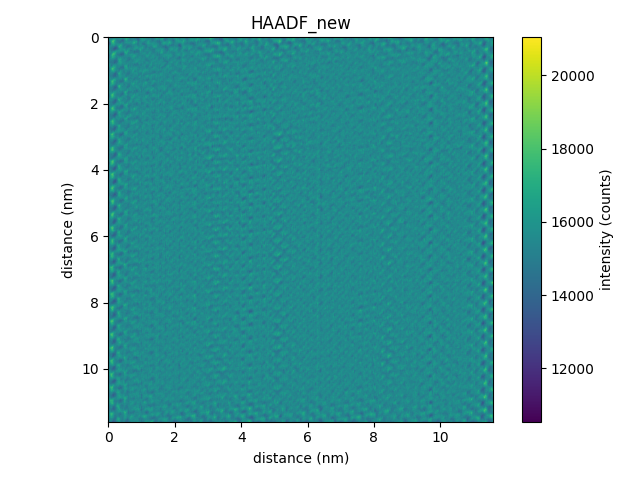

In [45]:
new_image = np.array(choose_image.dataset) - np.array(choose_image2.dataset)
new_image = choose_image.dataset.like_data(new_image)
vew = new_image.plot()